<a href="https://colab.research.google.com/github/193Toster/google-colab/blob/main/Another_copy_of_lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [2]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "DevOps",
    'area': 1,
    'page': 0,
    'per_page': 20
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
print(data.keys())
len(data['items'])

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])


20

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [37]:
from time import sleep

spec = ['финансист', 'нефтяник', 'космонавт', 'авиатор', 'курьер']
vacs = []
for sp in spec:
  vacs += [[]]
  URL = 'https://api.hh.ru/vacancies'

  params = {
    'text': sp,
    'area': 1,
    'page': 0,
    'per_page': 20
  }
  sleep(.017)
  pages = requests.get(URL, params).json()['pages']
  for page in range(pages):
      URL = 'https://api.hh.ru/vacancies'

      params = {
        'text': sp,
        'area': 1,
        'page': 0,
        'per_page': 20
      }
      sleep(.01)
      items = requests.get(URL, params).json()
      if 'items' not in items:
        break
      vacs[-1] += items['items']


(1 балл) Посчитайте сколько всего найдено вакансий:

In [38]:
ans = 0
for i in vacs:
  ans += len(i)
print(ans)

2300


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
class Company:
    # your code here

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
# your code here

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
# your code here

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
# your code here

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

In [ ]:
# your code here

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [ ]:
# your code here

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Ваши выводы здесь :)

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [3]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 76.2MB/s]


Создадим DataFrame:

In [41]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [5]:
diamonds[:5]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [6]:
print(len(diamonds))

219703


In [39]:
print(diamonds.shape[0])

219703


(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [7]:
col = diamonds['total_sales_price']
minc = min(col)
maxc = max(col)
mincx = -1
maxcx = -1
for i in range(len(diamonds)):
  if diamonds['total_sales_price'][i] == minc:
    mincx = i
for i in range(len(diamonds)):
  if diamonds['total_sales_price'][i] == maxc:
    maxcx = i
print(mincx, '-', minc)
print(maxcx, '-', maxc)

22 - 200
219702 - 1449881


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [8]:
gaps = 0
for col in diamonds:
  for item in diamonds[col]:
    if item == 'None' or item == 'unknown':
      gaps += 1
print(gaps)

1746027


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [42]:
for col in diamonds:
  is_gap = False
  for item in diamonds[col]:
    if item == 'None' or item == 'unknown':
      is_gap = True
  if is_gap:
    print(col)

color
cut_quality
eye_clean
culet_size
culet_condition
girdle_min
girdle_max
fluor_color
fluor_intensity
fancy_color_dominant_color
fancy_color_secondary_color
fancy_color_overtone
fancy_color_intensity


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [10]:
bad_cols = 0
for col in diamonds:
  if col[:12] == 'fancy_color_' or col[:6] == 'fluor_':
    bad_cols += 1
print(bad_cols)

6


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [11]:
inf_items = 0
for col in diamonds:
  if col[:12] == 'fancy_color_' or col[:6] == 'fluor_':
    for item in diamonds[col]:
      if item != 'None' and item != 'unknown':
        inf_items += 1
print(inf_items)

256727


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [12]:
for col in diamonds:
  if col[:12] == 'fancy_color_' or col[:6] == 'fluor_':
    del diamonds[col]

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [13]:
bad_cols = 0
for col in diamonds:
  if col[:6] == 'culet_':
    bad_cols += 1
print(bad_cols)
inf_items = 0
for col in diamonds:
  if col[:6] == 'culet_':
    for item in diamonds[col]:
      if item != 'None' and item != 'unknown':
        inf_items += 1
print(inf_items)
for col in diamonds:
  if col[:6] == 'culet_':
    del diamonds[col]

2
149282


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [14]:
total_cost = 0
for item in diamonds['total_sales_price']:
  if item != 'None' and item != 'unknown':
    total_cost += item
print(total_cost)

1517721991


Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [15]:
print(diamonds[::2])

        Unnamed: 0    cut    color clarity  carat_weight cut_quality  lab  \
0                0  Round        E    VVS2          0.09   Excellent  IGI   
2                2  Round        E    VVS2          0.09   Excellent  IGI   
4                4  Round        E    VVS2          0.09   Very Good  IGI   
6                6  Round        E    VVS2          0.09   Very Good  IGI   
8                8  Round        E    VVS2          0.09   Very Good  IGI   
...            ...    ...      ...     ...           ...         ...  ...   
219694      219695  Round        D      IF         12.52   Excellent  HRD   
219696      219697   Oval        H     VS2         18.88     unknown  GIA   
219698      219699  Round        E     VS1         10.65   Excellent  GIA   
219700      219701  Round        E     VS1         18.07   Excellent  GIA   
219702      219703   Pear  unknown    VVS2         10.03     unknown  GIA   

         symmetry     polish eye_clean  depth_percent  table_percent  \
0  

(0.5 балла) А теперь с индексами, кратными 6:

In [16]:
print(diamonds[::6])

        Unnamed: 0      cut    color clarity  carat_weight cut_quality  lab  \
0                0    Round        E    VVS2          0.09   Excellent  IGI   
6                6    Round        E    VVS2          0.09   Very Good  IGI   
12              12    Round        E    VVS2          0.09   Very Good  IGI   
18              18    Round        E    VVS2          0.09   Excellent  IGI   
24              24    Round        L      I1          0.34   Excellent  IGI   
...            ...      ...      ...     ...           ...         ...  ...   
219678      219679    Round        G     VS1         10.23   Excellent  GIA   
219684      219685  Radiant  unknown      I1          0.89     unknown  GIA   
219690      219691    Round        D    VVS2         10.10   Excellent  GIA   
219696      219697     Oval        H     VS2         18.88     unknown  GIA   
219702      219703     Pear  unknown    VVS2         10.03     unknown  GIA   

         symmetry     polish eye_clean  depth_perce

(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [17]:
print(diamonds[['cut', 'color', 'cut_quality', 'clarity', 'lab', 'symmetry', 'polish', 'eye_clean', 'girdle_min', 'girdle_max']])

             cut    color cut_quality clarity  lab   symmetry     polish  \
0          Round        E   Excellent    VVS2  IGI  Very Good  Very Good   
1          Round        E   Very Good    VVS2  IGI  Very Good  Very Good   
2          Round        E   Excellent    VVS2  IGI  Very Good  Very Good   
3          Round        E   Excellent    VVS2  IGI  Very Good  Very Good   
4          Round        E   Very Good    VVS2  IGI  Very Good  Excellent   
...          ...      ...         ...     ...  ...        ...        ...   
219698     Round        E   Excellent     VS1  GIA  Excellent  Excellent   
219699   Radiant  unknown     unknown     VS2  GIA  Very Good  Very Good   
219700     Round        E   Excellent     VS1  GIA  Excellent  Excellent   
219701  Princess  unknown     unknown     SI2  GIA       Good       Good   
219702      Pear  unknown     unknown    VVS2  GIA  Very Good  Excellent   

       eye_clean girdle_min girdle_max  
0        unknown          M          M  
1    

>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [18]:
col = diamonds['total_sales_price']
print(np.array([col]).dot(np.array([col]).transpose()))

[[158540672665477]]


### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

Text(0.5, 1.0, 'цвет бриллианта - стоимость')

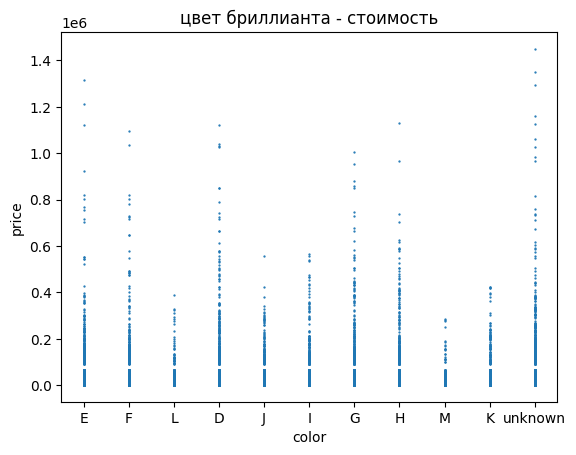

In [19]:
plt.scatter([*diamonds['color']], [*diamonds['total_sales_price']], 0.4)
plt.xlabel("color")
plt.ylabel("price")
plt.title('цвет бриллианта - стоимость')

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

Text(0.5, 1.0, 'лабараторная оценка - кол-во бриллиантов')

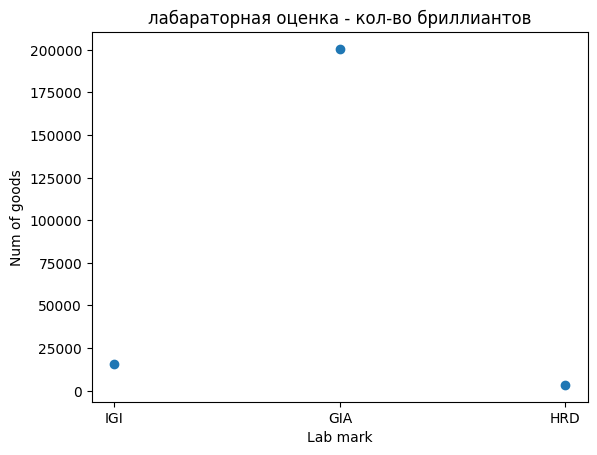

In [20]:
labs = {*diamonds['lab']}
goods = {}
for i in labs:
  goods[i] = 0
  for item in diamonds['lab']:
    if item == i:
      goods[i] += 1
plt.scatter(goods.keys(), goods.values())
plt.xlabel("Lab mark")
plt.ylabel("Num of goods")
plt.title('лабараторная оценка - кол-во бриллиантов')

(2 балла) Постройте график `вес бриллианта - стоимость`:

Text(0.5, 1.0, 'вес бриллианта - стоимость')

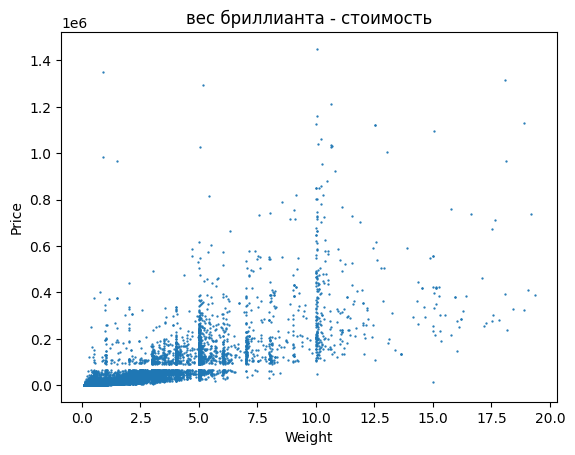

In [21]:
plt.scatter([*diamonds['carat_weight']], [*diamonds['total_sales_price']], 0.4)
plt.xlabel("Weight")
plt.ylabel("Price")
plt.title('вес бриллианта - стоимость')

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

Text(0.5, 1.0, 'система оценки GIA Cut - кол-во бриллиантов')

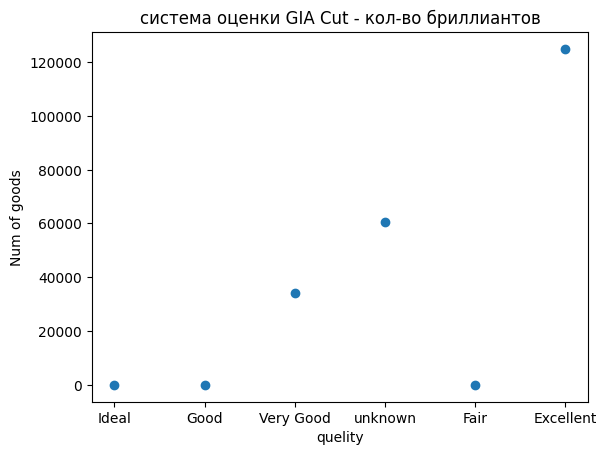

In [22]:
labs = {*diamonds['cut_quality']}
goods = {}
for i in labs:
  goods[i] = 0
  for item in diamonds['cut_quality']:
    if item == i:
      goods[i] += 1
plt.scatter(goods.keys(), goods.values())
plt.xlabel("quelity")
plt.ylabel("Num of goods")
plt.title('система оценки GIA Cut - кол-во бриллиантов')

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Более тяжелые весят в среднем большем, но не сильно, значит это не решающий показатель. цвет не оказыает значительного влияния на цену. Очень много мусорных данных.

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [23]:
diam = diamonds[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]
print(diam[:10])

   meas_length  meas_width  meas_depth  total_sales_price
0         2.85        2.87        1.79                200
1         2.84        2.89        1.78                200
2         2.88        2.90        1.77                200
3         2.86        2.88        1.78                200
4         2.79        2.83        1.82                200
5         2.95        2.99        1.81                200
6         2.85        2.88        1.84                200
7         2.86        2.89        1.78                200
8         2.89        2.92        1.85                200
9         2.83        2.87        1.80                200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [30]:
diam = diam.sample(frac=1).reset_index(drop=True)

(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [31]:
diam['dist'] = [(diam['meas_length'][i] ** 3 + diam['meas_width'][i] ** 3 + diam['meas_depth'][i] ** 3) ** (1 / 3) for i in range(len(diam))]
diam

,meas_length,meas_width,meas_depth,total_sales_price,dist
0,5.19,5.21,3.20,3152,6.796791
1,5.66,5.69,3.56,3576,7.432940
2,3.91,3.92,2.28,712,5.089908
3,5.28,5.31,3.34,3816,6.939471
4,5.47,3.93,2.46,1748,6.208008
...,...,...,...,...,...
219698,3.66,3.68,2.21,648,4.786446
219699,5.05,5.09,3.12,3174,6.626942
219700,4.39,4.41,2.78,1018,5.767552
219701,9.76,7.13,4.32,15231,11.113974


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [32]:
nd = diam[['dist', 'total_sales_price']]

(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [33]:
train = nd.truncate(after=int(.8*len(nd)))
test = nd.truncate(before=int(.8*len(nd))+1)
#print(len(nd), len(test), len(train), len(nd) - len(test) - len(train))

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

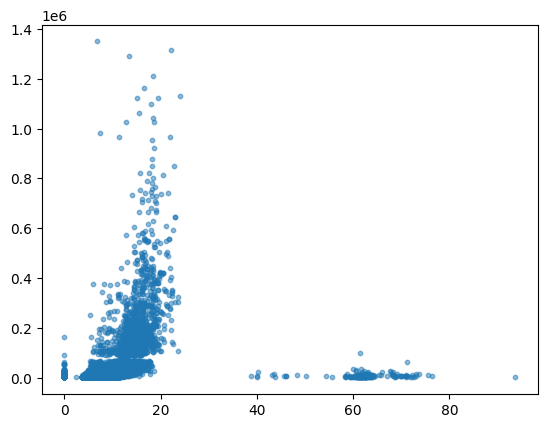

In [34]:
plt.scatter(train['dist'], train['total_sales_price'], s=10, alpha=0.5)

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

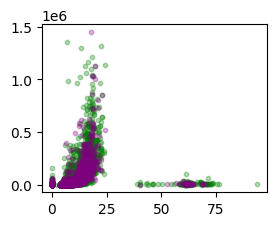

In [35]:
plt.subplot(2, 2, 1)
plt.scatter(train['dist'], train['total_sales_price'], c='green', s=10, alpha=0.3)
plt.subplot(2, 2, 1)
plt.scatter(test['dist'], test['total_sales_price'], c='purple', s=10, alpha=0.3)

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
nebour = [0 for i in range(len(test))]
dist = [1e100 for i in range(len(test))]
l = int(.8*len(nd))
for i in range(len(test)):
  for j in range(len(train)):
    k = (abs(diam['meas_length'][j] - diam['meas_length'][i + l]) ** 3 + abs(diam['meas_width'][j] - diam['meas_width'][i + l]) ** 3 + abs(diam['meas_depth'][j] - diam['meas_depth'][i + l]) ** 3) ** (1 / 3)
    if k < dist[i]:
      dist[i]= k;
      nebour = j



KeyboardInterrupt: 

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
# your code here

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)